In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 불러오기

In [2]:
df = pd.read_csv('C:/Users/KJY/Desktop/data/train_ML_IOT.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


## 데이터 파악

In [3]:
df.shape # 행 48120개 열 4개

(48120, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [6]:
df.describe(include = 'all')

,DateTime,Junction,Vehicles,ID
count,48120,48120.000000,48120.000000,4.812000e+04
unique,14592,NaN,NaN,NaN
top,2017-06-30 23:00:00,NaN,NaN,NaN
freq,4,NaN,NaN,NaN
mean,NaN,2.180549,22.791334,2.016330e+10
std,NaN,0.966955,20.750063,5.944854e+06
min,NaN,1.000000,1.000000,2.015110e+10
25%,NaN,1.000000,9.000000,2.016042e+10
50%,NaN,2.000000,15.000000,2.016093e+10
75%,NaN,3.000000,29.000000,2.017023e+10


## 교차로 별 그룹화

In [7]:
df_junction = df.groupby('Junction').mean(numeric_only =True)

In [8]:
df_junction = df_junction.reset_index()

In [9]:
df_junction

,Junction,Vehicles,ID
0,1,45.052906,2.016260e+10
1,2,14.253221,2.016260e+10
2,3,13.694010,2.016260e+10
3,4,7.251611,2.017037e+10


<AxesSubplot:xlabel='Junction', ylabel='Vehicles'>

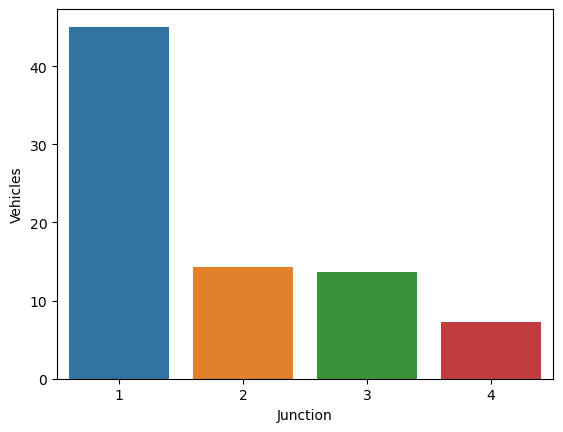

In [10]:
sns.barplot(x='Junction', y='Vehicles', data=df_junction)

In [11]:
df1 = df[df['Junction'] == 1]
df2 = df[df['Junction'] == 2]
df3 = df[df['Junction'] == 3]
df4 = df[df['Junction'] == 4]

In [12]:
df_list = [df1, df2, df3, df4]

In [13]:
df_list[0]

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
14587,2017-06-30 19:00:00,1,105,20170630191
14588,2017-06-30 20:00:00,1,96,20170630201
14589,2017-06-30 21:00:00,1,90,20170630211
14590,2017-06-30 22:00:00,1,84,20170630221


In [14]:
for i in range(0, 4, 1):
    df_list[i].drop(['Junction', 'ID'], axis=1, inplace=True)
    df_list[i].set_index('DateTime', inplace =True)
    df_list[i].index = pd.to_datetime(df_list[i].index)

C:\Users\KJY\AppData\Local\Temp\ipykernel_15968\1889016006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].drop(['Junction', 'ID'], axis=1, inplace=True)
C:\Users\KJY\AppData\Local\Temp\ipykernel_15968\1889016006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i].drop(['Junction', 'ID'], axis=1, inplace=True)
C:\Users\KJY\AppData\Local\Temp\ipykernel_15968\1889016006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

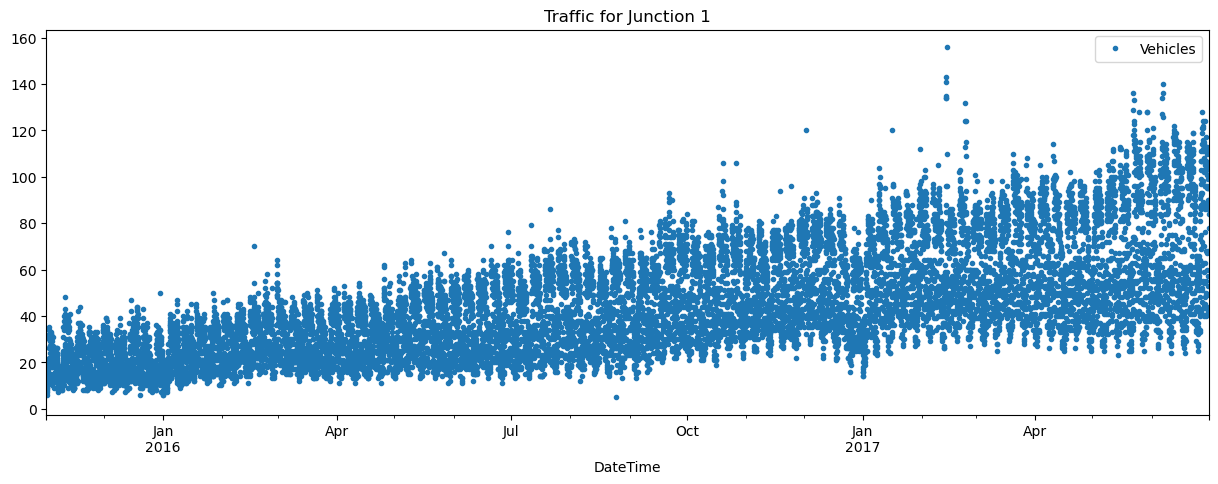

In [15]:
df1.plot(style='.',
        figsize=(15, 5),
        title='Traffic for Junction 1')
plt.show()

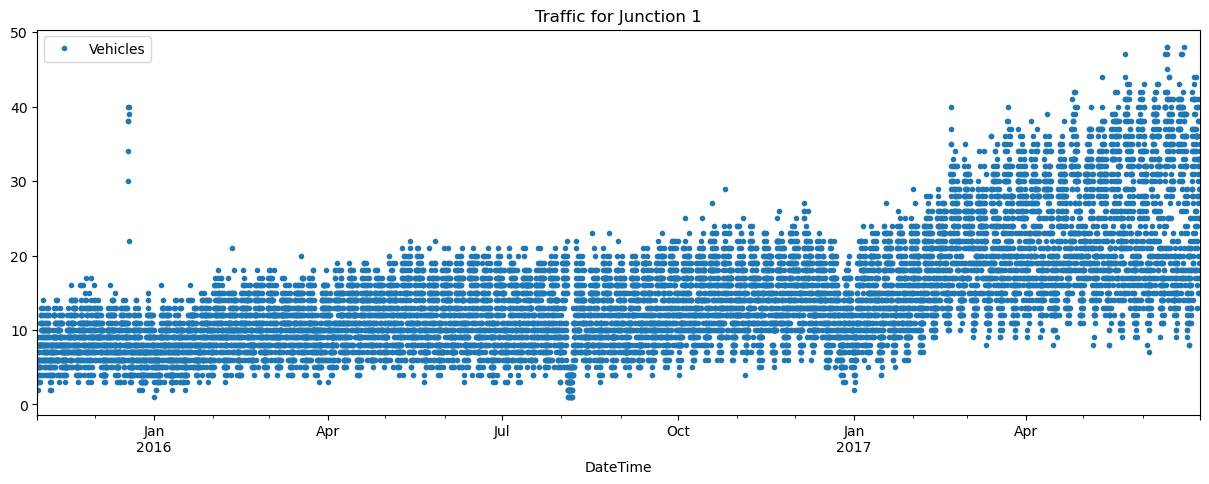

In [16]:
df2.plot(style='.',
        figsize=(15, 5),
        title='Traffic for Junction 1')
plt.show()

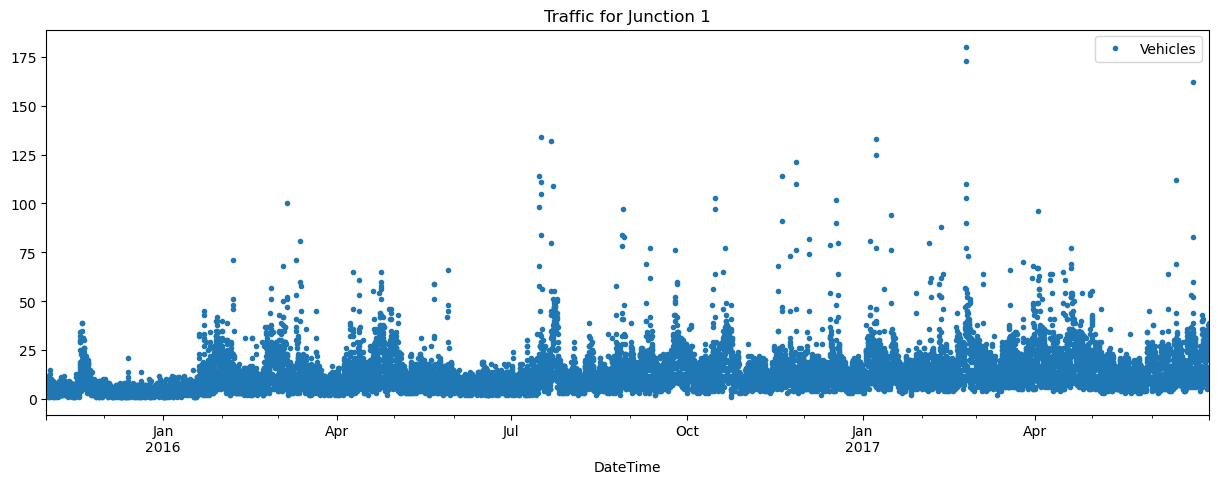

In [17]:
df3.plot(style='.',
        figsize=(15, 5),
        title='Traffic for Junction 1')
plt.show()

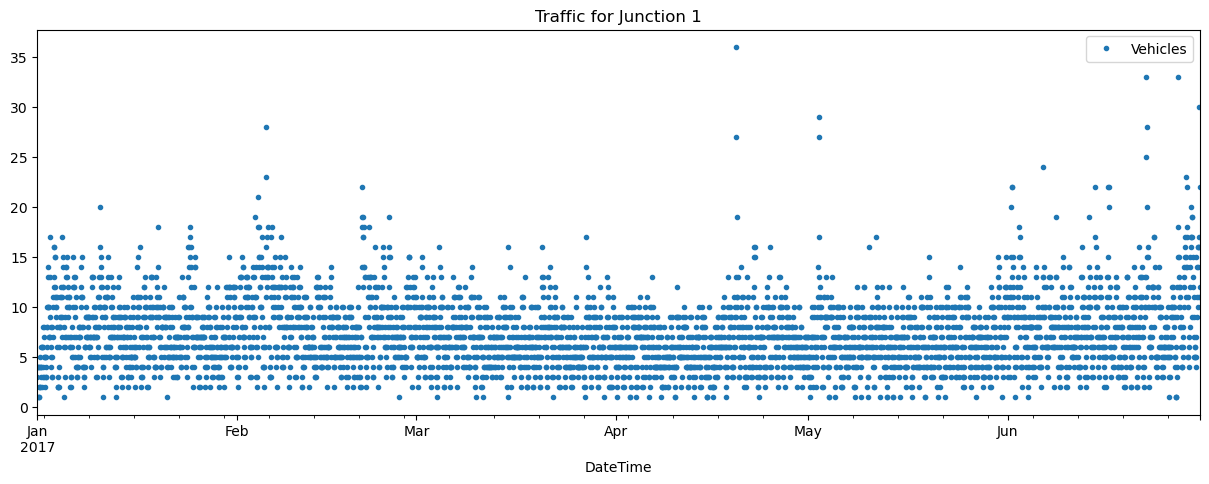

In [18]:
df4.plot(style='.',
        figsize=(15, 5),
        title='Traffic for Junction 1')
plt.show()

<AxesSubplot:ylabel='Frequency'>

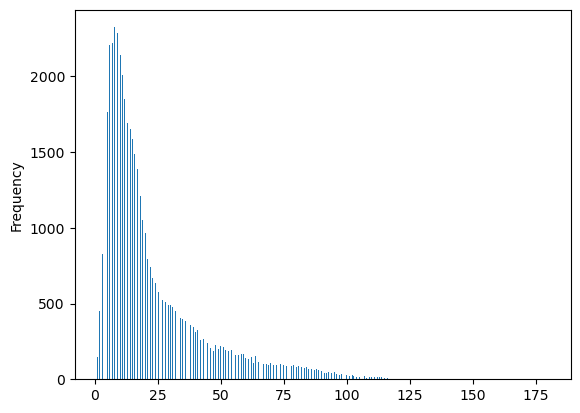

In [19]:
df['Vehicles'].plot(kind='hist', bins=500)

## 연, 월, 일 ,시간에 대하여

In [20]:
df_date = df.copy()

In [21]:
df_date = df_date.set_index('DateTime')

In [22]:
df_date.index = pd.to_datetime(df_date.index)

In [23]:
df_date['year'] = df_date.index.year
df_date['month'] = df_date.index.month
df_date['day'] = df_date.index.day
df_date['hour'] = df_date.index.hour
df_date['weekday'] = df_date.index.weekday

In [24]:
df_date

,Junction,Vehicles,ID,year,month,day,hour,weekday
DateTime,,,,,,,,
2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,6
2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,6
2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,6
2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,6
2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,6
...,...,...,...,...,...,...,...,...
2017-06-30 19:00:00,4,11,20170630194,2017,6,30,19,4
2017-06-30 20:00:00,4,30,20170630204,2017,6,30,20,4
2017-06-30 21:00:00,4,16,20170630214,2017,6,30,21,4


In [25]:
df_date["IsWeekend"] = df_date["weekday"] >= 5

In [26]:
weekday_names = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}

df_date['weekday'] = df_date['weekday'].map(weekday_names)

In [27]:
df_date1 = df_date[df_date['Junction'] == 1]
df_date2 = df_date[df_date['Junction'] == 2]
df_date3 = df_date[df_date['Junction'] == 3]
df_date4 = df_date[df_date['Junction'] == 4]

In [28]:
df_date_list = [df_date1, df_date2, df_date3, df_date4]

<AxesSubplot:xlabel='hour', ylabel='Vehicles'>

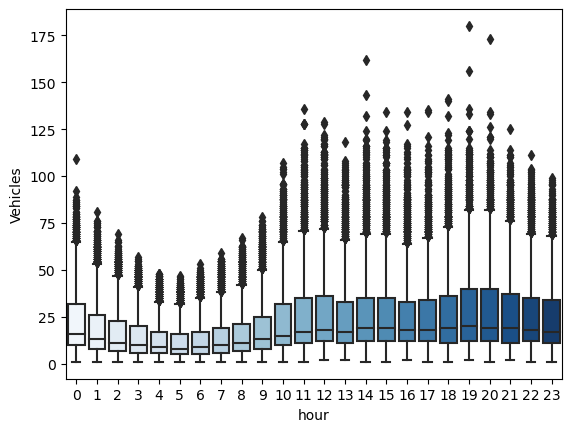

In [29]:
sns.boxplot(data=df_date, x='hour', y='Vehicles', palette='Blues')

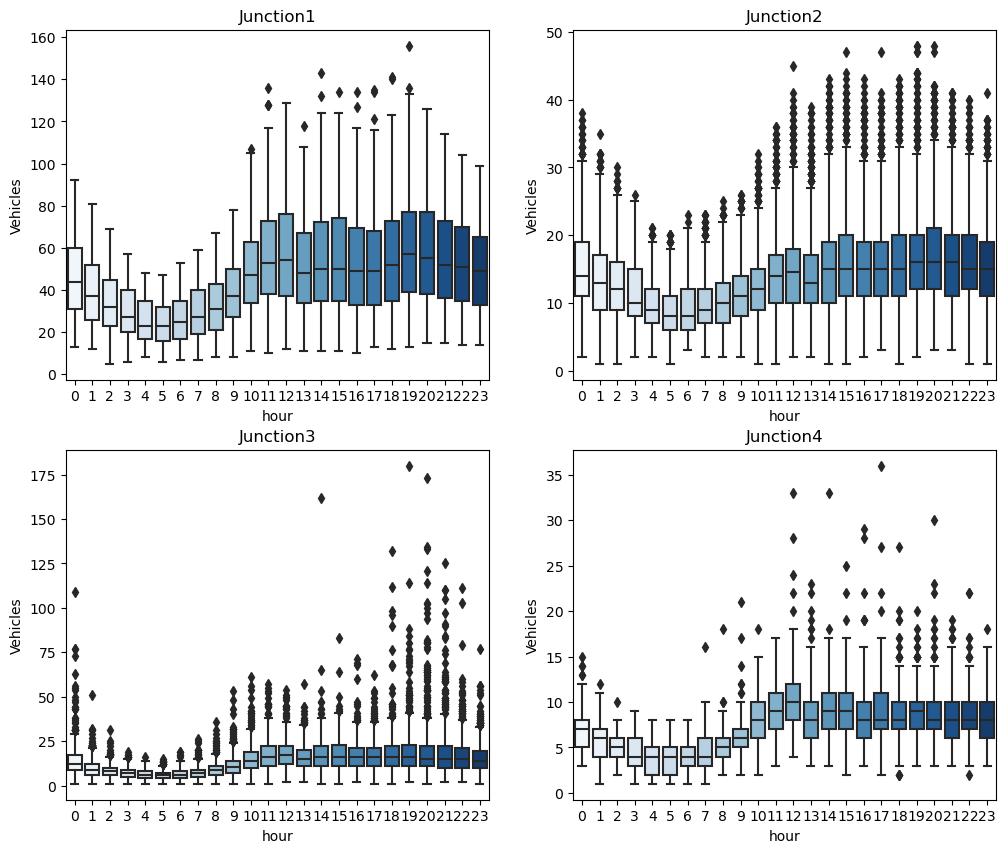

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
for i in range(0, 4):
    row = i//2
    column = i%2
    sns.boxplot(data=df_date_list[i], x='hour', y='Vehicles', ax=axs[row][column],palette='Blues')
    axs[row][column].set_title('Junction{}'.format(i+1))

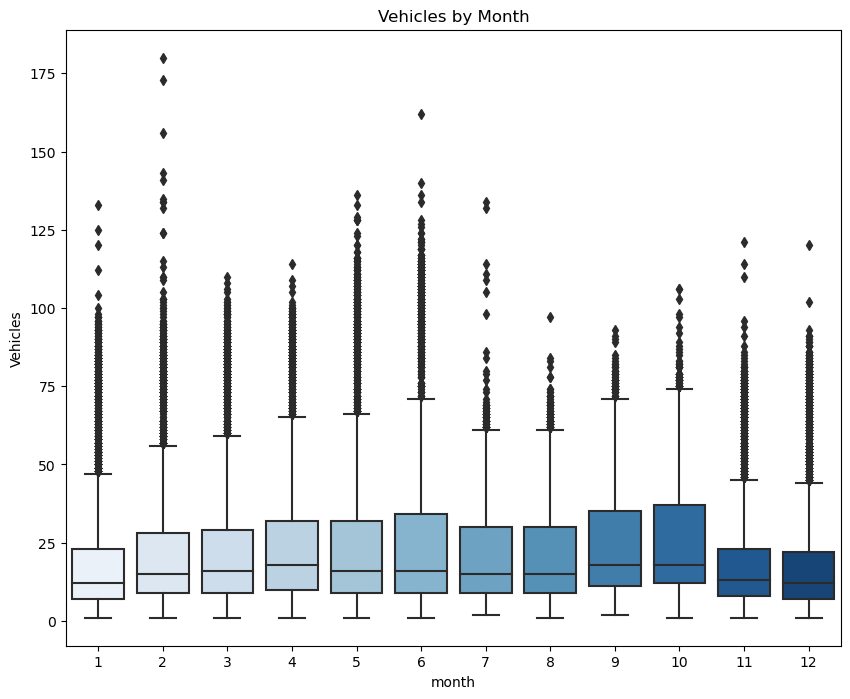

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_date, x='month', y='Vehicles', palette='Blues')
ax.set_title('Vehicles by Month')
plt.show()

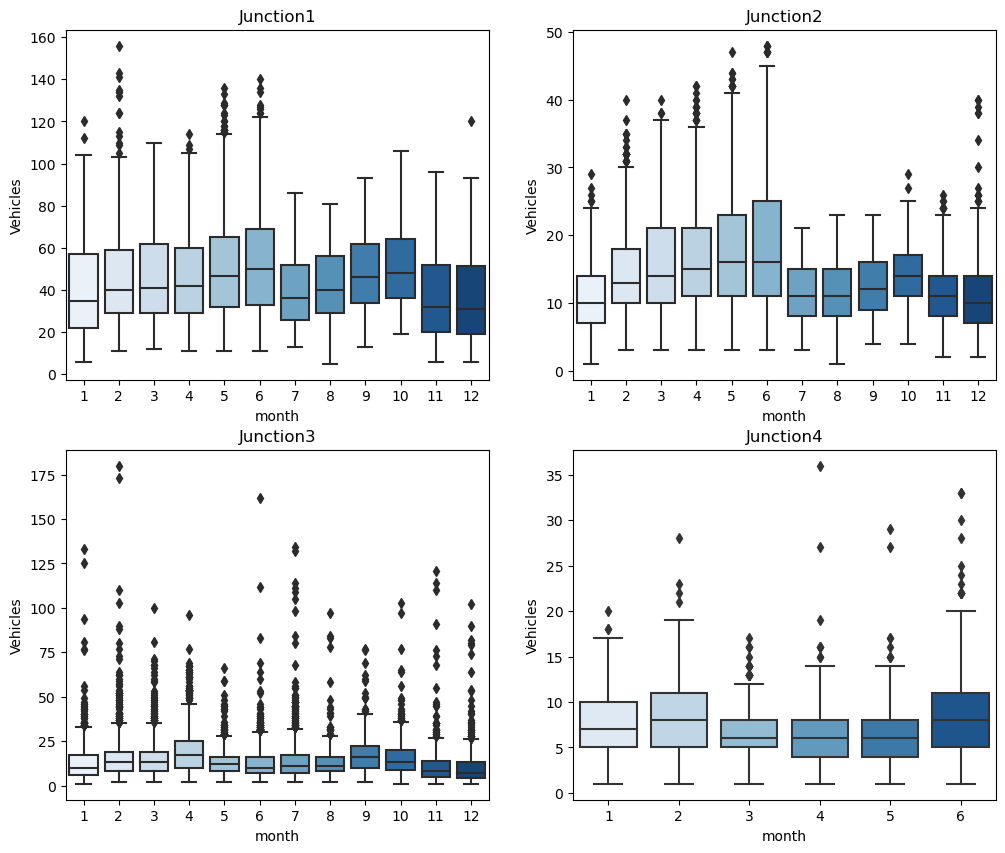

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
for i in range(0, 4):
    row = i//2
    column = i%2
    sns.boxplot(data=df_date_list[i], x='month', y='Vehicles', ax=axs[row][column], palette='Blues')
    axs[row][column].set_title('Junction{}'.format(i+1))

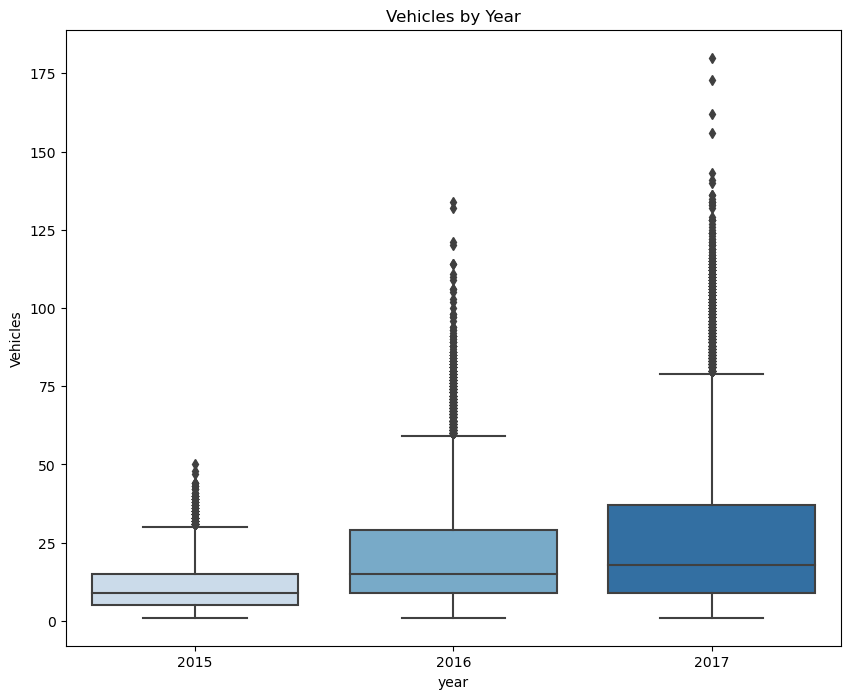

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_date, x='year', y='Vehicles', palette='Blues')
ax.set_title('Vehicles by Year')
plt.show()

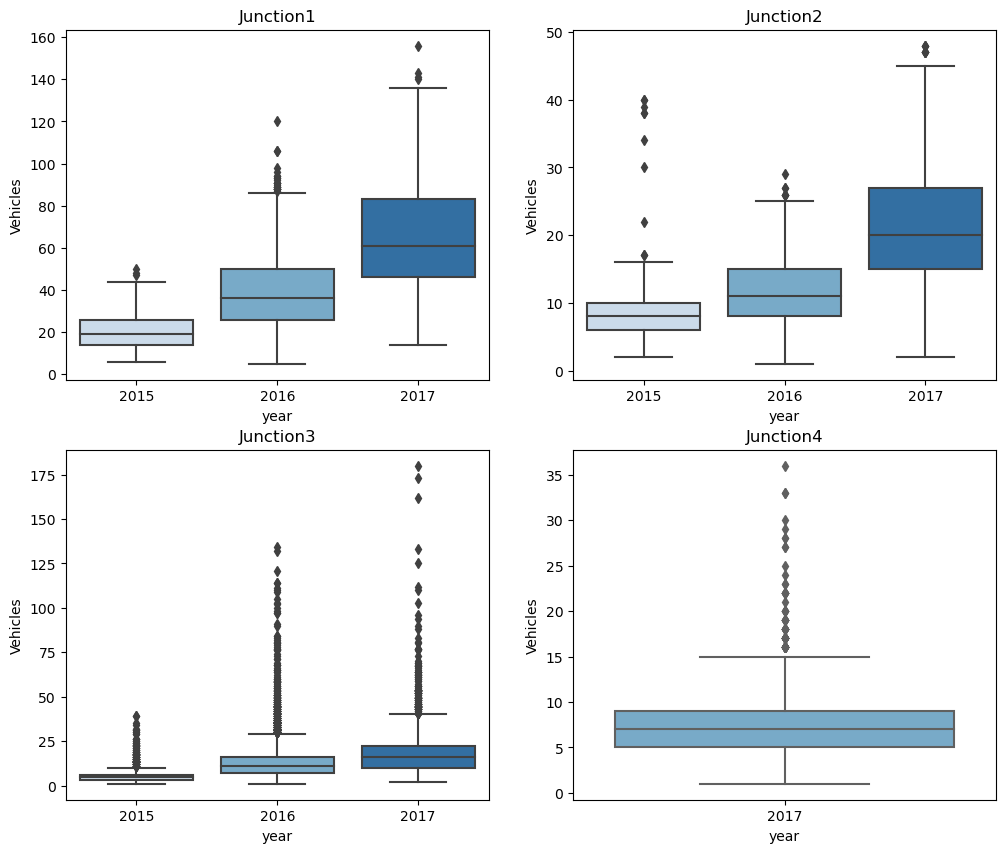

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
for i in range(0, 4):
    row = i//2
    column = i%2
    sns.boxplot(data=df_date_list[i], x='year', y='Vehicles', ax=axs[row][column], palette='Blues')
    axs[row][column].set_title('Junction{}'.format(i+1))

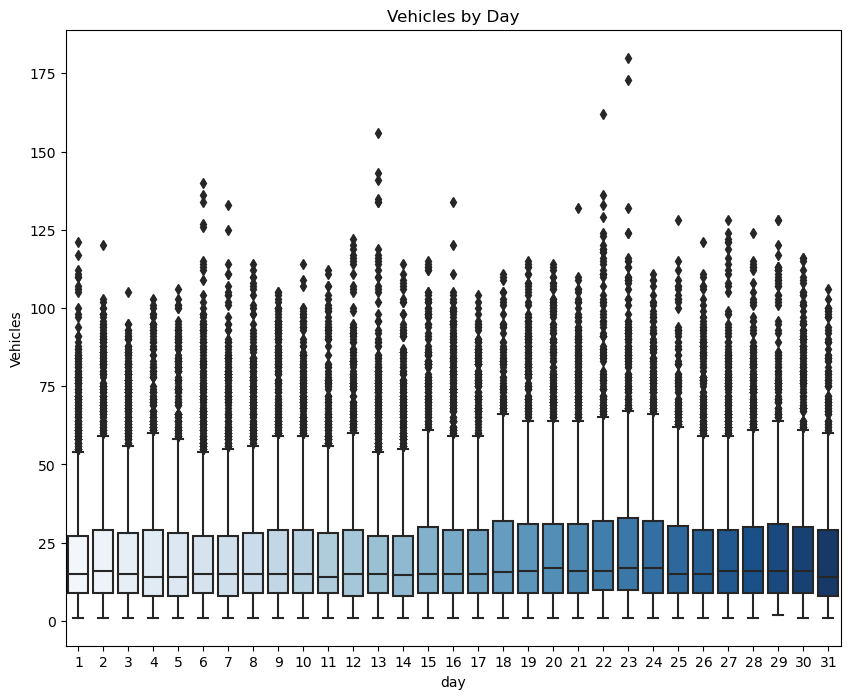

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_date, x='day', y='Vehicles', palette='Blues')
ax.set_title('Vehicles by Day')
plt.show()

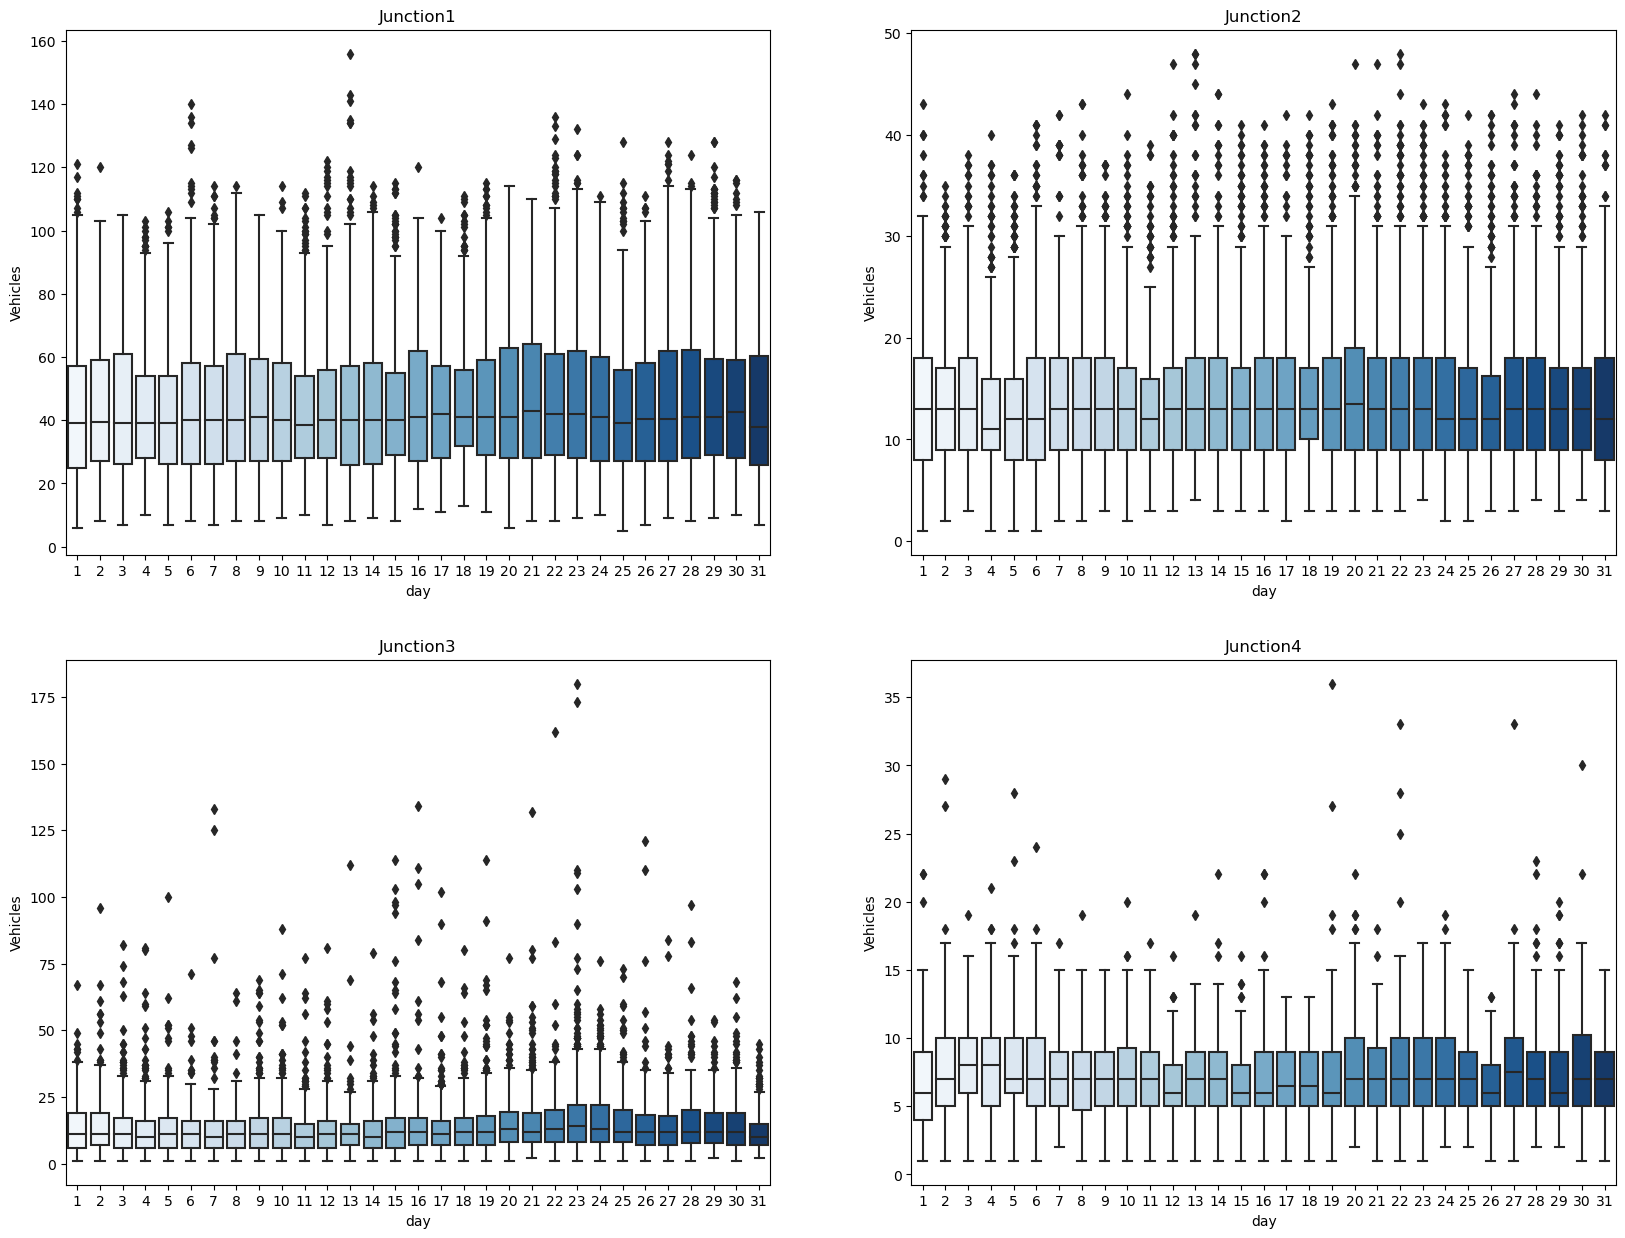

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
for i in range(0, 4):
    row = i//2
    column = i%2
    sns.boxplot(data=df_date_list[i], x='day', y='Vehicles', ax=axs[row][column], palette='Blues')
    axs[row][column].set_title('Junction{}'.format(i+1))

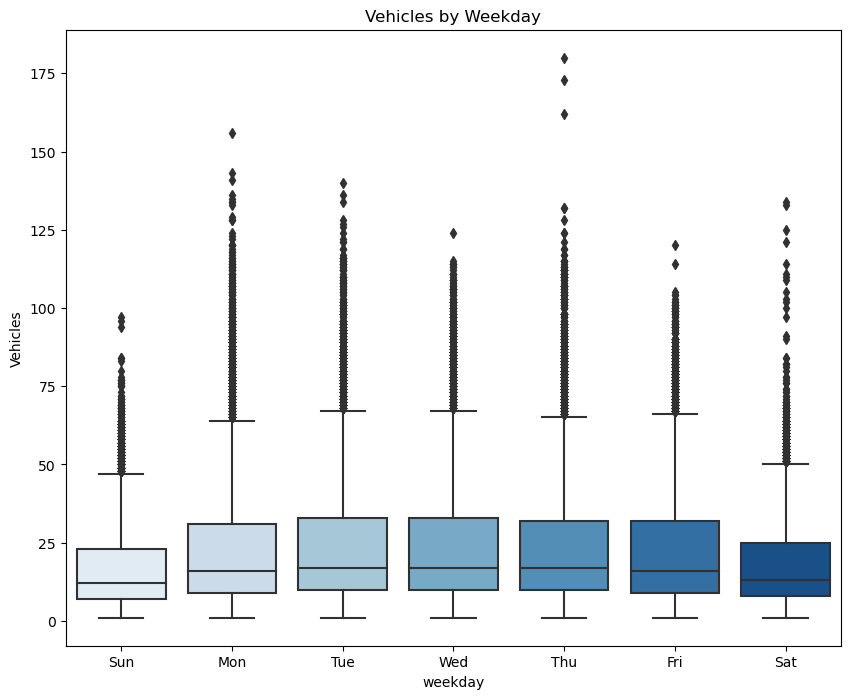

In [37]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_date, x='weekday', y='Vehicles', palette='Blues')
ax.set_title('Vehicles by Weekday')
plt.show()

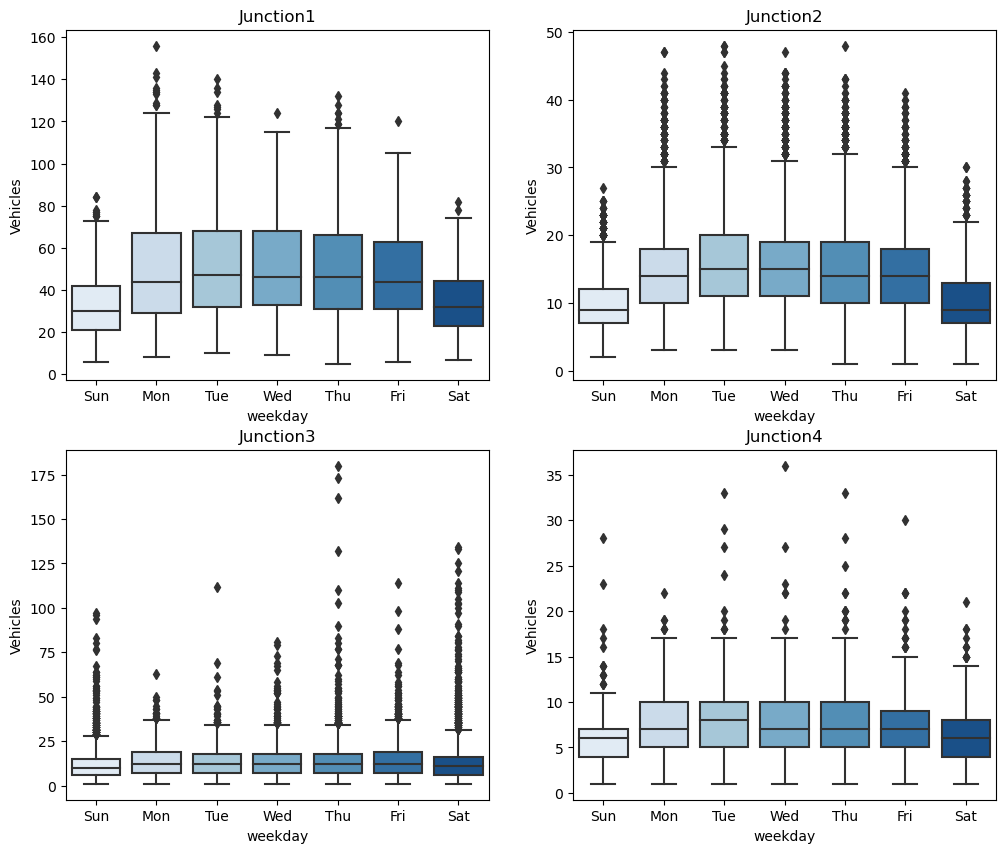

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
for i in range(0, 4):
    row = i//2
    column = i%2
    sns.boxplot(data=df_date_list[i], x='weekday', y='Vehicles', ax=axs[row][column], palette='Blues')
    axs[row][column].set_title('Junction{}'.format(i+1))

In [39]:
df_weekend = df_date.groupby("IsWeekend").mean()
df_weekend = df_weekend.reset_index()

In [40]:
df_weekend

,IsWeekend,Junction,Vehicles,ID,year,month,day,hour
0,False,2.181185,24.760163,2.016331e+10,2016.270383,5.896864,15.685017,11.5
1,True,2.178947,17.834722,2.016329e+10,2016.268421,5.852632,15.740351,11.5


<AxesSubplot:xlabel='IsWeekend', ylabel='Vehicles'>

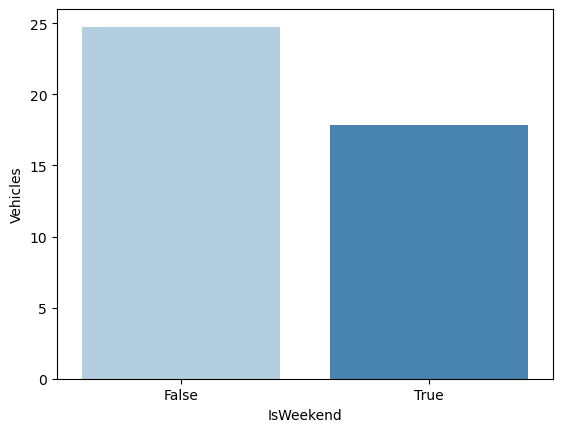

In [41]:
sns.barplot(data = df_weekend, x='IsWeekend', y='Vehicles', palette='Blues')

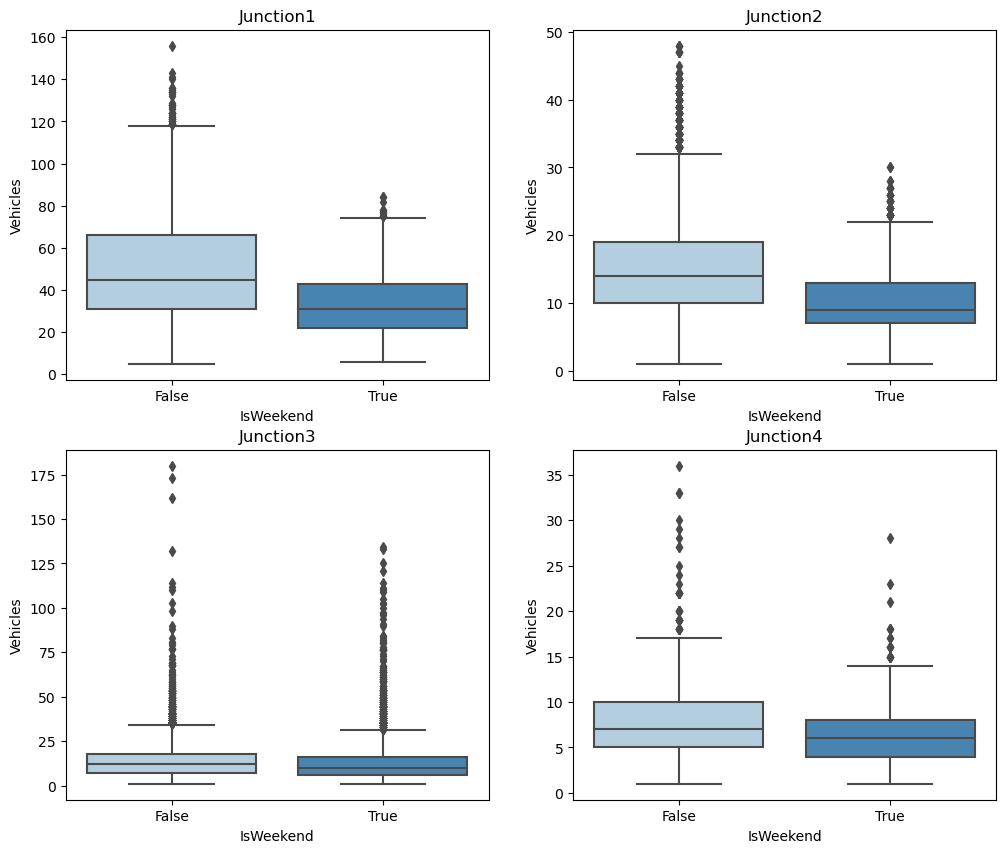

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
for i in range(0, 4):
    row = i//2
    column = i%2
    sns.boxplot(data=df_date_list[i], x='IsWeekend', y='Vehicles', ax=axs[row][column], palette='Blues')
    axs[row][column].set_title('Junction{}'.format(i+1))